<a href="https://colab.research.google.com/github/betty9895/ml-0716/blob/master/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston["data"],
                  columns = boston["feature_names"])
df["answer"] = boston["target"]
df.to_csv("boston.csv",encoding="utf8",index = False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# !pip install opencv-python
# !ls -la

In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split([1,2,3,4],
#                  [5,6,7,8],
#                  [9,10,11,12],
#                  test_size = 0.1 )
# 隨機切，非固定
x_train, x_test, y_train, y_test = train_test_split(boston["data"], boston["target"], test_size = 0.1)

x_train, x_test, y_train, y_test

(array([[7.36711e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         9.67300e+01, 2.15200e+01],
        [2.59150e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
         3.92110e+02, 1.71900e+01],
        [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
         3.92800e+02, 1.35100e+01],
        ...,
        [2.98190e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
         3.77510e+02, 3.92000e+00],
        [3.03470e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
         3.96900e+02, 6.15000e+00],
        [8.70700e-02, 0.00000e+00, 1.28300e+01, ..., 1.87000e+01,
         3.86960e+02, 1.02700e+01]]),
 array([[1.44550e-01, 1.25000e+01, 7.87000e+00, 0.00000e+00, 5.24000e-01,
         6.17200e+00, 9.61000e+01, 5.95050e+00, 5.00000e+00, 3.11000e+02,
         1.52000e+01, 3.96900e+02, 1.91500e+01],
        [5.02300e-02, 3.50000e+01, 6.06000e+00, 0.00000e+00, 4.37900e-01,
         5.70600e+00, 2.84000e+01, 6.64070e+00, 1.00000e+00, 3.04000e+02,
         1.69000e+01, 3.9402

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5,random_state=0)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

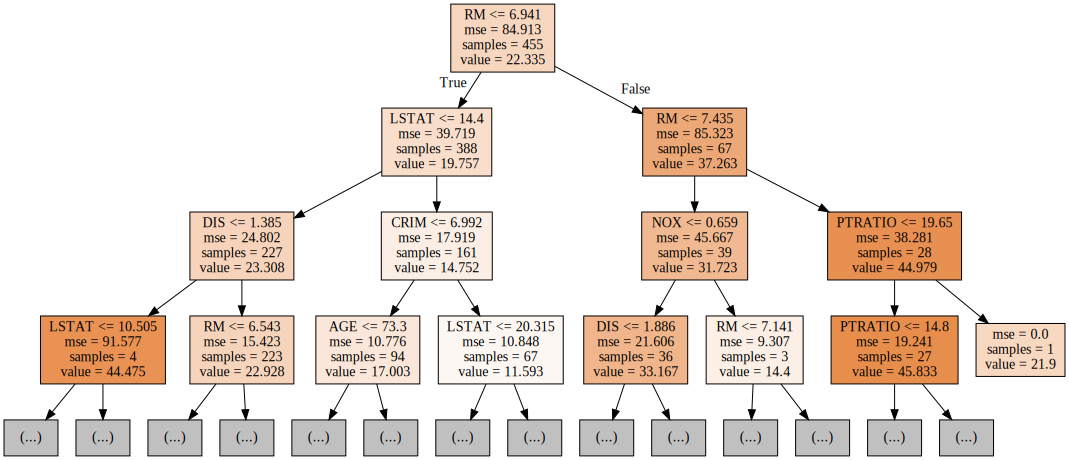

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg,
                  feature_names=boston["feature_names"],
                  filled=True,
                  max_depth=3)
graphviz.Source(g)

In [ ]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test,pre)
# 和正確的距離

0.8125045440410731